# dimentionality reduction using Kernel PCA

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [2]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Applying Kernel PCA

In [3]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

## training with logistic regression

In [4]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Making the Confusion Matrix

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


1.0

## training set visualization

/tmp/ipykernel_14284/3318974776.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


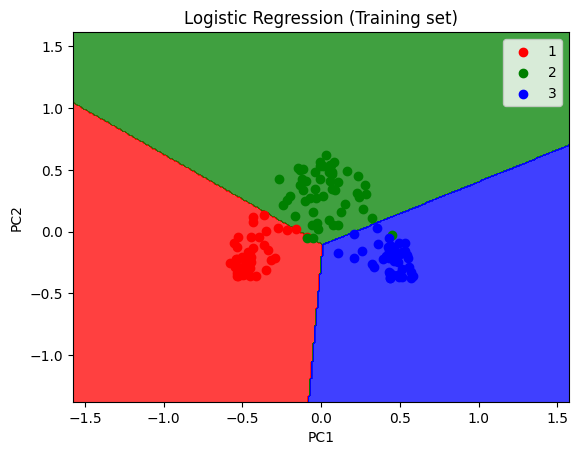

In [6]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## test set visualization

/tmp/ipykernel_14284/3946207957.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


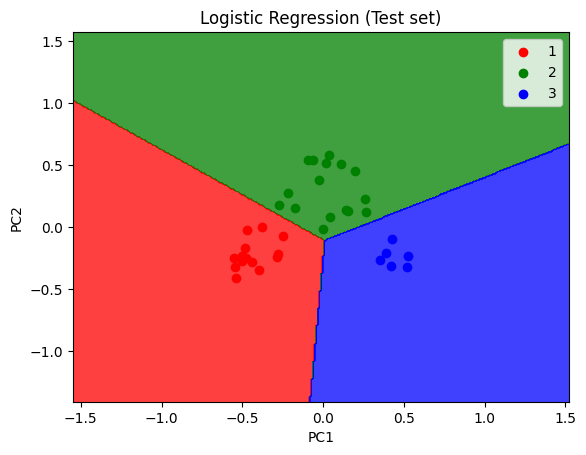

In [7]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Inertia without PCA: 1277.928488844642
Silhouette score without PCA: 0.2848589191898987
Inertia with PCA: 260.0166626835765
Silhouette score with PCA: 0.5601697480957203


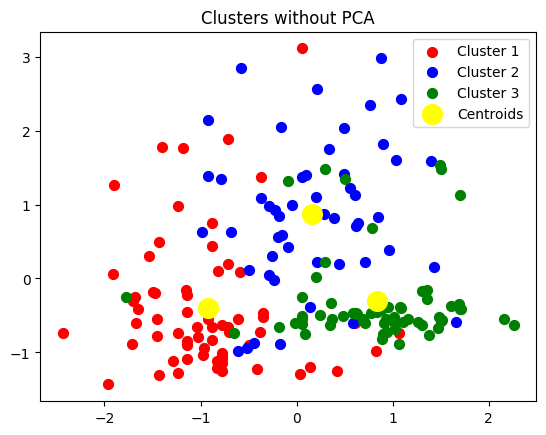

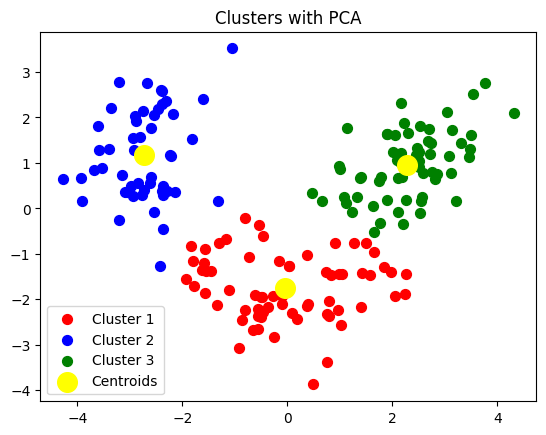

In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load dataset
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, :-1].values

# Standardizing the features
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Clustering without PCA
kmeans = KMeans(n_clusters=3, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)

# Inertia and Silhouette score without PCA
inertia_no_pca = kmeans.inertia_
silhouette_no_pca = silhouette_score(X_scaled, y_kmeans)

print(f"Inertia without PCA: {inertia_no_pca}")
print(f"Silhouette score without PCA: {silhouette_no_pca}")

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Clustering with PCA
kmeans_pca = KMeans(n_clusters=3, random_state=0)
y_kmeans_pca = kmeans_pca.fit_predict(X_pca)

# Inertia and Silhouette score with PCA
inertia_pca = kmeans_pca.inertia_
silhouette_pca = silhouette_score(X_pca, y_kmeans_pca)

print(f"Inertia with PCA: {inertia_pca}")
print(f"Silhouette score with PCA: {silhouette_pca}")

# Visualization of the clustering results

import matplotlib.pyplot as plt

# Without PCA
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters without PCA')
plt.legend()
plt.show()

# With PCA
plt.scatter(X_pca[y_kmeans_pca == 0, 0], X_pca[y_kmeans_pca == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X_pca[y_kmeans_pca == 1, 0], X_pca[y_kmeans_pca == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X_pca[y_kmeans_pca == 2, 0], X_pca[y_kmeans_pca == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters with PCA')
plt.legend()
plt.show()


KMeans with 2 PCA components | Inertia: 260.0166626835765 | Silhouette Score: 0.5601697480957203
AgglomerativeClustering with 2 PCA components | Inertia: None | Silhouette Score: 0.5590883962040384
GaussianMixture with 2 PCA components | Inertia: None | Silhouette Score: 0.5591116207103003
KMeans with 5 PCA components | Inertia: 825.0208377375332 | Silhouette Score: 0.3690763194699229
AgglomerativeClustering with 5 PCA components | Inertia: None | Silhouette Score: 0.34679305595565335
GaussianMixture with 5 PCA components | Inertia: None | Silhouette Score: 0.3599647051085355


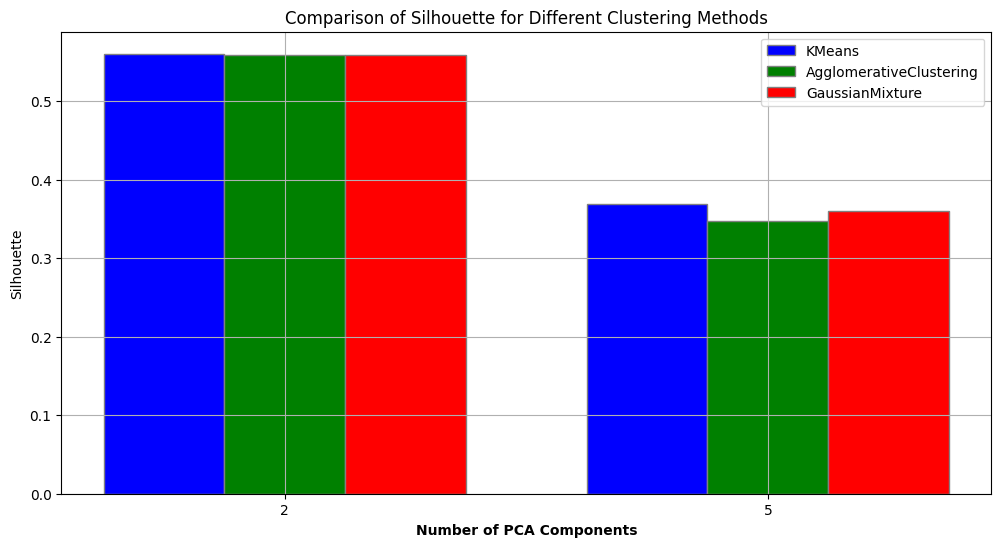

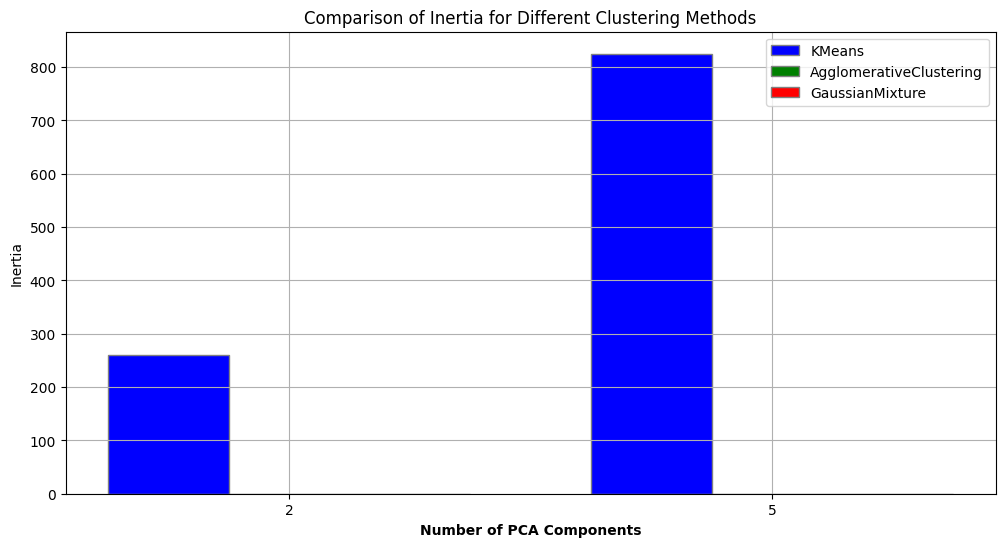

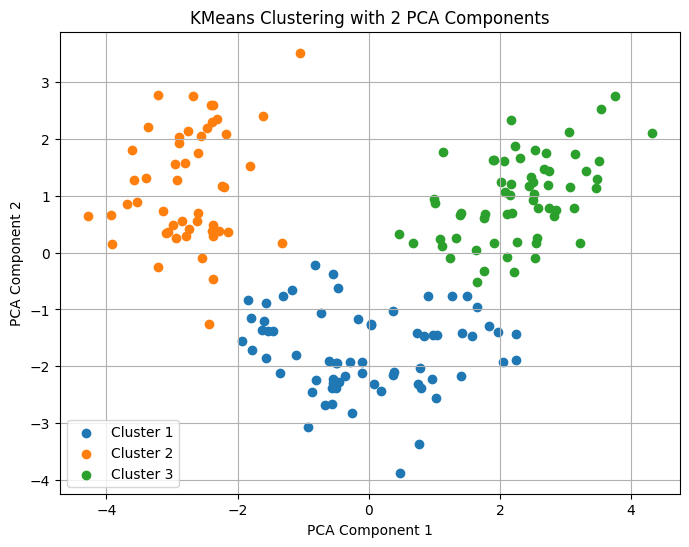

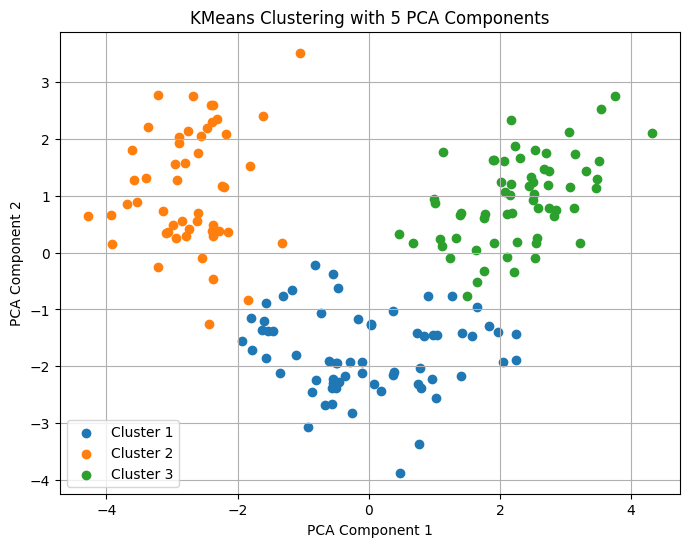

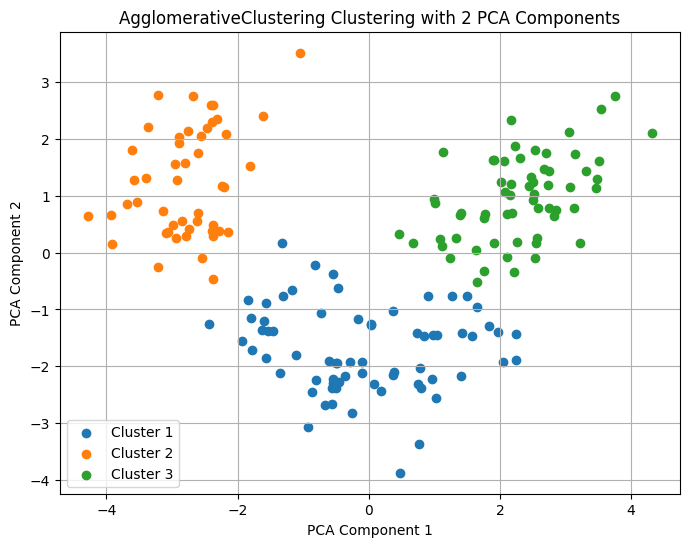

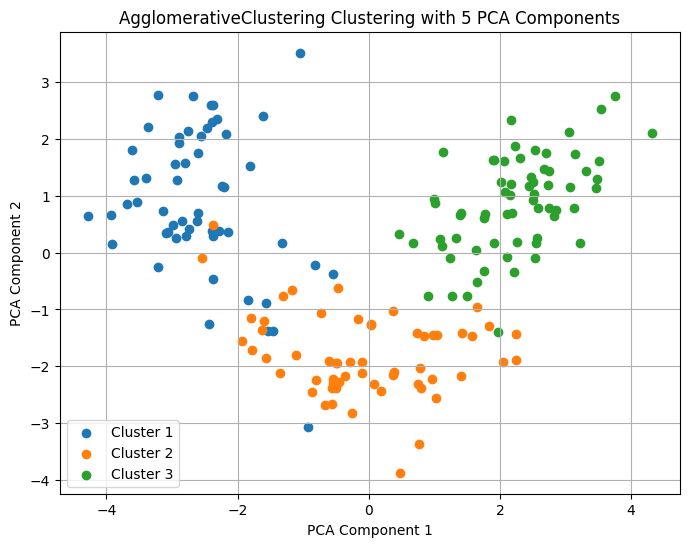

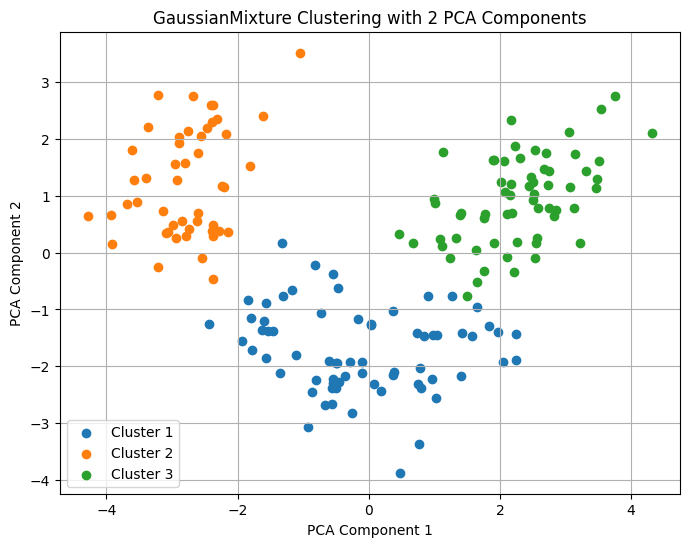

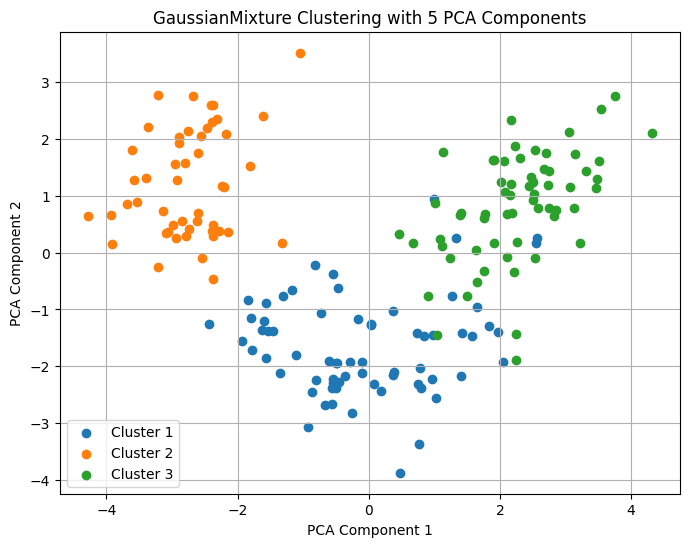

In [20]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load dataset
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, :-1].values

# Standardizing the features
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Function to evaluate clustering and store results
def evaluate_clustering(algorithm_name, model, data, pca_components):
    if hasattr(model, 'fit_predict'):
        y_pred = model.fit_predict(data)
    else:
        model.fit(data)
        y_pred = model.predict(data)

    inertia = model.inertia_ if hasattr(model, 'inertia_') else None
    silhouette = silhouette_score(data, y_pred) if len(set(y_pred)) > 1 else None
    
    clustering_results[algorithm_name].append({
        'pca_components': pca_components,
        'inertia': inertia,
        'silhouette': silhouette,
        'labels': y_pred
    })
    print(f"{algorithm_name} with {pca_components} PCA components | Inertia: {inertia} | Silhouette Score: {silhouette}")

# Initialize results dictionary
clustering_results = {
    'KMeans': [],
    'AgglomerativeClustering': [],
    'GaussianMixture': []
}

# Set clustering models
kmeans = KMeans(n_clusters=3, random_state=0)
agglo = AgglomerativeClustering(n_clusters=3)
gmm = GaussianMixture(n_components=3, random_state=0)

# Define PCA components range
pca_components_range = [2, 5]

# Evaluate clustering algorithms with different PCA components
for n_components in pca_components_range:
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)

    # Evaluate KMeans
    evaluate_clustering('KMeans', kmeans, X_pca, n_components)

    # Evaluate Agglomerative Clustering
    evaluate_clustering('AgglomerativeClustering', agglo, X_pca, n_components)

    # Evaluate Gaussian Mixture Model
    evaluate_clustering('GaussianMixture', gmm, X_pca, n_components)

# Plotting the results as bar charts
def plot_bar_performance_metric(metric):
    plt.figure(figsize=(12, 6))

    # Set the width of bars
    bar_width = 0.25
    pca_components = [result['pca_components'] for result in clustering_results['KMeans']]

    # Create position of bar on X axis
    r1 = np.arange(len(pca_components))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]

    # Extract metric values for each clustering algorithm
    kmeans_metric = [result[metric] for result in clustering_results['KMeans']]
    agglo_metric = [result[metric] for result in clustering_results['AgglomerativeClustering']]
    gmm_metric = [result[metric] for result in clustering_results['GaussianMixture']]

    # Filter None values for inertia plotting
    if metric == 'inertia':
        agglo_metric = [x if x is not None else 0 for x in agglo_metric]  # Set to 0 or another default
        gmm_metric = [x if x is not None else 0 for x in gmm_metric]      # Set to 0 or another default

    # Plot bars for each algorithm
    plt.bar(r1, kmeans_metric, color='b', width=bar_width, edgecolor='grey', label='KMeans')
    plt.bar(r2, agglo_metric, color='g', width=bar_width, edgecolor='grey', label='AgglomerativeClustering')
    plt.bar(r3, gmm_metric, color='r', width=bar_width, edgecolor='grey', label='GaussianMixture')

    plt.xlabel('Number of PCA Components', fontweight='bold')
    plt.xticks([r + bar_width for r in range(len(pca_components))], pca_components)
    plt.ylabel(metric.capitalize())
    plt.title(f'Comparison of {metric.capitalize()} for Different Clustering Methods')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot Silhouette Score and Inertia
plot_bar_performance_metric('silhouette')
plot_bar_performance_metric('inertia')

# Function to plot clusters
def plot_clusters(X_pca, labels, title):
    plt.figure(figsize=(8, 6))
    unique_labels = set(labels)
    
    for label in unique_labels:
        plt.scatter(X_pca[labels == label, 0], X_pca[labels == label, 1], label=f'Cluster {label + 1}')
        
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot clusters for each algorithm
for algorithm, results in clustering_results.items():
    for result in results:
        plot_clusters(X_pca, result['labels'], f'{algorithm} Clustering with {result["pca_components"]} PCA Components')
